In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from cvxopt import matrix, solvers

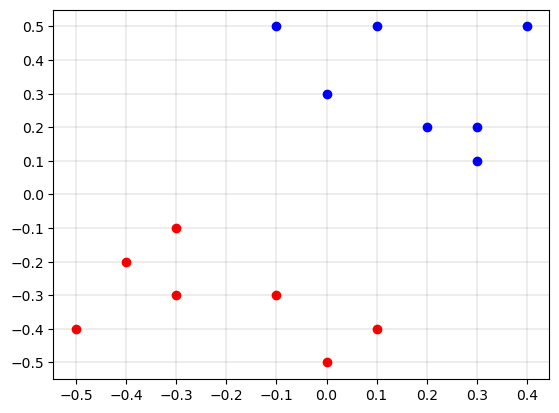

In [2]:
#Nomor 1
colors = ['red', 'blue']

X_train = np.array([[.2, .2], [-.1, .5], [.3, .2], [.1, .5], [.3, .1], [.0, .3], [.4, .5], 
                   [-.3, -.3], [.1, -.4], [-.1, -.3], [.0, -.5], [-.3, -.1], [-.5, -.4], [-.4, -.2]])
y_train = np.array([1., 1., 1., 1., 1., 1., 1., -1., -1., -1., -1., -1., -1., -1.])
X_test = np.array([[-.4, .4], [-.5, .5], [-.4, .5], [-.3, .4], [.5, .0], [.4, .1], [.5, .4], [.1, .3],
                 [.2, .3], [-.3, .5], [.3, .4], [.1, .2], [.5, .2], [-.1, .3], [.0, .5], [.5, -.5],
                 [.5, -.4], [-.5, .1], [-.1, -.2], [.0, -.3], [.3, -.3], [-.4, -.1], [.3, -.4], [.1, -.3],
                 [.1, -.5], [-.2, -.2], [-.3, -.2], [-.5, -.1], [-.4, -.4], [-.5, -.5], [-.2, -.5], [-.2, +.4]])
y_test = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., -1.,
                  -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

n_train, D = X_train.shape
n_test, _ = X_test.shape

def scatter_plot(ax, X, y):
    unique = np.unique(y)
    for i in range(len(unique)):
        X_s = X[y == unique[i]]
        ax.set_xticks(np.arange(-.5,.6,.1))
        ax.set_yticks(np.arange(-.5,.6,.1))
        ax.scatter(X_s[:, 0], X_s[:, 1], c=colors[i])
        ax.grid(visible=True, which='both', color='k', linestyle='-', linewidth=.1)

fig, ax = plt.subplots()
scatter_plot(ax, X_train, y_train)
plt.show()

     pcost       dcost       gap    pres   dres
 0: -3.9566e+00 -9.9644e+00  2e+01  4e+00  2e+00
 1: -5.3822e+00 -8.3614e+00  4e+00  4e-01  2e-01
 2: -7.3460e+00 -8.2900e+00  1e+00  7e-02  3e-02
 3: -7.9669e+00 -8.0139e+00  5e-02  5e-04  2e-04
 4: -7.9986e+00 -8.0008e+00  2e-03  6e-06  2e-06
 5: -7.9999e+00 -8.0001e+00  2e-04  2e-09  8e-10
 6: -8.0000e+00 -8.0000e+00  3e-05  2e-15  3e-16
 7: -8.0000e+00 -8.0000e+00  4e-06  1e-15  1e-16
Optimal solution found.
alpha =  [[0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 8. 0. 0.]]
w =  [2.39852179 3.20110867]
bias =  0.03966739921779372


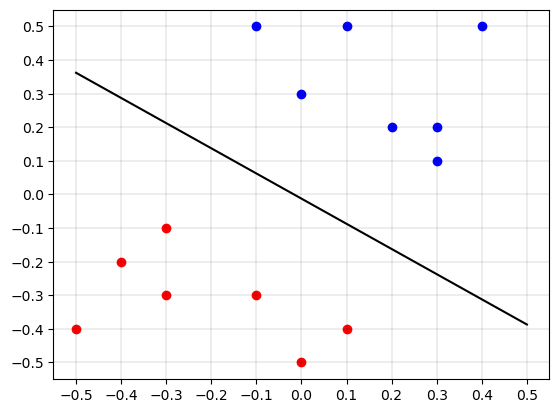

In [3]:
#Nomor 2
K = y_train[:, None] * X_train
KKt = K.dot(K.T)
P = matrix(KKt)
q = matrix(-np.ones((n_train, 1)))
G = matrix(-np.eye(n_train))
h = matrix(np.zeros(n_train))
A = matrix(y_train.reshape(1, -1))
b = matrix(np.zeros(1))

solvers.options['show_progress'] = True
qp_solver = solvers.qp(P, q, G, h, A, b)
alpha = np.array(qp_solver['x'])
print('alpha = ', np.round(alpha.T, 2))

w = np.sum(alpha * y_train[:, None] * X_train, axis=0)
print('w = ', w)

th = (alpha > 1e-4).reshape(-1)
b = y_train[th] - X_train[th].dot(w)
bias = b[0]
print('bias = ', bias)

norm = np.linalg.norm(w)
w, bias = w/norm, bias/norm
fig, ax = plt.subplots()

m = -w[0]/w[1]
intercept = -bias/w[1]
x2 = np.arange(-.5, 1)
ax.plot(x2, x2*m + intercept, 'k-')
scatter_plot(ax, X_train, y_train)
plt.show()

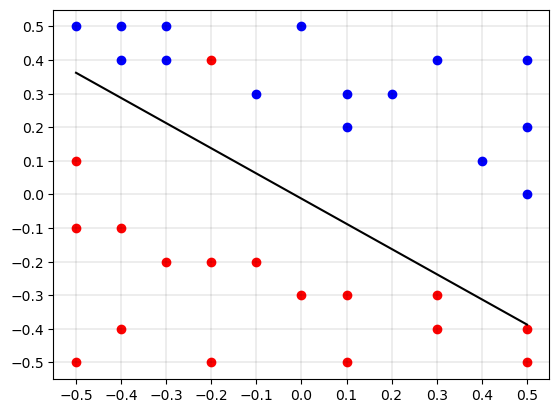

In [4]:
#Nomor 3
norm = np.linalg.norm(w)
w, bias = w/norm, bias/norm
fig, ax = plt.subplots()

m = -w[0]/w[1]
intercept = -bias/w[1]
x2 = np.arange(-.5, 1)
ax.plot(x2, x2*m + intercept, 'k-')
scatter_plot(ax, X_test, y_test)
plt.show()

In [5]:
#Nomor 4
y_pred_train = (w.dot(X_train.T)+bias > 0)*2 - 1
y_pred_test = (w.dot(X_test.T)+bias > 0)*2 - 1
print('Prediksi data training: ', y_pred_train)
print('Prediksi data testing: ', y_pred_test)

acc_train = np.sum(y_pred_train == y_train)/n_train * 100
acc_test = np.sum(y_pred_test == y_test)/n_test * 100
print('Akurasi training = ', acc_train, '%')
print('Akurasi testing = ', acc_test, '%')

Prediksi data training:  [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
Prediksi data testing:  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1]
Akurasi training =  100.0 %
Akurasi testing =  96.875 %
